# Finance Factoring

# **Table of Contents**

1. [Problem Statement](#Section2)<br>
2. [Installing & Importing Libraries](#Section3)<br>
3. [Data Acquisition & Description](#Section4)<br>
4. [Data Pre-processing](#Section5)<br>
5. [Exploratory Data Analysis](#Section6)<br>
6. [Post Data Processing & Feature Selection](#Section7)<br>
7. [Model Development & Evaluation](#Section8)<br>
  7.1 [Linear Regression](#Section81)<br>
  7.2 [Ridge Regression](#Section82)<br>
  7.3 [Lasso Regression](#Section83)<br>
  7.4 [Random Forest Regression](#Section84)<br>
8. [Conclusion](#Section9)<br>

<a id = Section2></a>
# **1. Problem Statement**

The **biggest challenge** of factoring **is to predict** whether an **invoice will be paid or not**. The **factor provides funds** against this future payment to the business people by buying their invoice. The **factor** then **collects** the **payment and charges their interest rate** or discounts (if acceptable). **If** the **invoice isn't paid**, the **factor loses their advanced funds**.



**<h3>Scenario:</h3>**

**Riviera Finance**, a USA based financial company, **provides** simple, flexible and effective **funding** and account monitoring within 24 hours of verification. Riviera Finance **provides up to 95 percent** of the invoice **funding** with proper paperwork submitted, as well as credit services and receivables management. **Firms interested** in participating in all of these services will **receive** a full-value package specially designed for their unique financial needs.

They have **experienced employees** who **uses** the **complex rules** to identify the invoice receivables duration. They are using **traditional ways** of assessing the return receivables duration, which might **not** be **good** for the company because **as the size of data** will **increase** their traditional methods might not be good enough. They **wants to automate** their **process** by which machine learns the pattern out of their data to find out the duration of the invoice getting paid.

Now the **question is how this problem could be solved using Machine Learning?** While there are many ways to assess & predict the receivables. **We will** be **working with a simple scenario to solve this problem**.

The **target feature** in the acquired data set is **days_late** and it's values are:

|Target Feature|Potential Values|
| :-- | :-- |
|days_late|Range: [0, 45]|

<a id = Section3></a>
# **2. Importing Libraries**

In [0]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)
# For Numerical Python
import numpy as np
# For Scientifc Python
from scipy import stats
# For random numbers
from random import randint
# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# For Feature Selection
from sklearn.feature_selection import SelectFromModel
# For metrics evaluation
from sklearn.metrics import mean_squared_error, r2_score
# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

<a id=Section4></a>
# **3. Data Acquisition & Description**

This data set is **based on Finance Factoring of USA states, year(2012-2013)**, and it can be retrieved from the <a href="https://storage.googleapis.com/industryanalytics/FactoringData.csv">link</a>.


| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 2466 | 13 | 248 KB|



| Id | Features | Description |
| :--| :--| :--|
|01|**cust_id**|Unique ID of customer|
|02|**state**|State of US|
|03|**area_code**|Area code of state|
|04|**bill_date**|Billing Date|
|05|**bill_type**|Bill type. It is either Paper or Electronic|
|06|**invoice_id**|Invoice Number|
|07|**invoice_amount**|Invoice Amount (in thousands)|
|08|**invoice_init_date**|Invoice submit date|
|09|**invoice_final_date**|Final date to submit invoice amount|
|10|**invoice_settled_date**|Settlement date of invoice amount|
|11|**disputed**|Whether disputed or not|
|12|**days_to_settle**|Days left to settle the invoice amount|
|13|**days_late**|Days late to settle the invoice amount|

In [0]:
LINK = 'https://storage.googleapis.com/industryanalytics/FactoringData.csv'

def load_factor_data(link = LINK):
  return pd.read_csv(filepath_or_buffer = link)

In [0]:
data = load_factor_data()
print('Data Shape:', data.shape)
data.head()

Data Shape: (2466, 13)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
0,3271-HYHDN,Los Angeles,818,28-04-2013,Paper,354407690,45.56,12-04-2013,12-05-2013,17-04-2013,No,5,0
1,1604-LIFKX,Los Angeles,818,16-03-2013,Electronic,3693123052,47.82,25-04-2013,25-05-2013,03-06-2013,No,39,9
2,6160-HCSFI,State of OK,391,10-01-2013,Electronic,4026967253,69.48,30-08-2013,29-09-2013,17-09-2013,No,18,0
3,9883-SDWFS,State of KS,897,08-07-2013,Paper,1491017498,19.23,09-05-2012,08-06-2012,02-06-2012,No,24,0
4,3676-CQAIF,State of KS,897,29-07-2013,Paper,2137157897,20.55,21-07-2013,20-08-2013,06-08-2013,No,16,0


### **Data Description**

In this section we will **get information about the data** and see some observations.

In [0]:
data.describe()

,area_code,invoice_id,invoice_amount,days_to_settle,days_late
count,2466.000000,2.466000e+03,2466.000000,2466.00000,2466.000000
mean,620.446067,4.978431e+09,59.895856,26.44485,3.442417
std,215.933610,2.884272e+09,20.435838,12.33493,6.290607
min,391.000000,6.113650e+05,5.260000,0.00000,0.000000
25%,406.000000,2.528854e+09,46.400000,18.00000,0.000000
50%,770.000000,4.964228e+09,60.560000,26.00000,0.000000
75%,818.000000,7.494512e+09,73.765000,35.00000,5.000000
max,897.000000,9.990244e+09,128.280000,75.00000,45.000000


**Observation:**

- The **average amount** that has been **obtained by the customers is $\$$50.89 dollars**.
- On **average it took ~26 days to settle the invoice amount** obtained by the customer.
- **On average customer is ~3 days late for the payment**.
- **50% of the customers are 0 days late for the payment** of the receivables.

### **Data Information**

In this section we will see the **information about features i.e. types, count and null?**.

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 13 columns):
cust_id                 2466 non-null object
state                   2466 non-null object
area_code               2466 non-null int64
bill_date               2466 non-null object
bill_type               2466 non-null object
invoice_id              2466 non-null int64
invoice_amount          2466 non-null float64
invoice_init_date       2466 non-null object
invoice_final_date      2466 non-null object
invoice_settled_date    2466 non-null object
disputed                2466 non-null object
days_to_settle          2466 non-null int64
days_late               2466 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 250.6+ KB


**Observation:**

- We can see that there are **no missing data** as all **features contains equal number of records**.
- **bill_date, invoice_init_date, invoice_final_date, invoice_settled_date** seems to have been idenified incorrectly because they don't have correct types.

### **Numerical Data Distribution**

We shall plot all **numerical features to analyze the distribution** of their past.

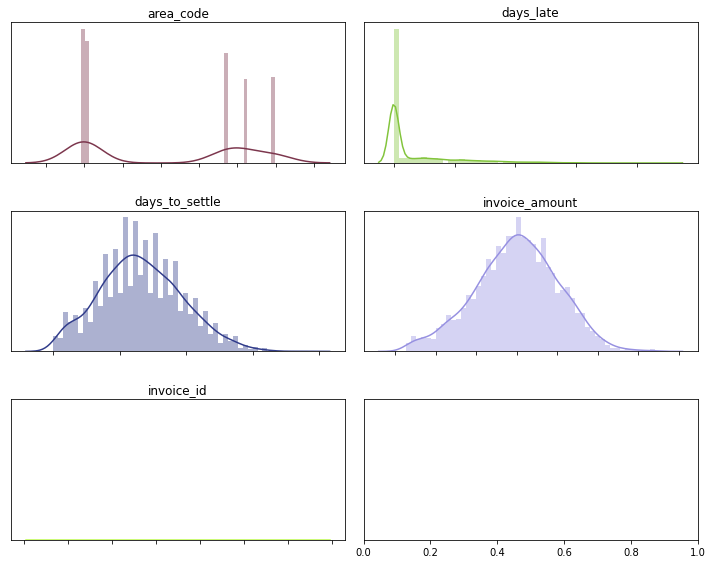

In [0]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharex = False, figsize=(10, 8))
columns = ['area_code', 'days_late', 'days_to_settle', 'invoice_amount', 'invoice_id']
# Generating random colors
colors = []
for i in range(len(columns)):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(False)
plt.tight_layout()

**Observation:**

- **area_code and days_late** seems to be **positively distributed**.
- **days_to_settle, invoice_amount and invoice_id** amount is alomost **normally distributed**.

### **Categorical Data Distribution**

We shall plot all **categorical features to analyze the distribution** of the past data.
- **Firstly, we will extract all the categorical features**.
- Then **drop the date features** as they are identified as object types. At later stage, we will correct these types for our further analysis.

In [0]:
# Extracting Categorical Features
cat_list = []
for i in data.columns.values:
  if (data[i].dtype == 'object'):
    cat_list.append(i)
print(cat_list)

['cust_id', 'state', 'bill_date', 'bill_type', 'invoice_init_date', 'invoice_final_date', 'invoice_settled_date', 'disputed']


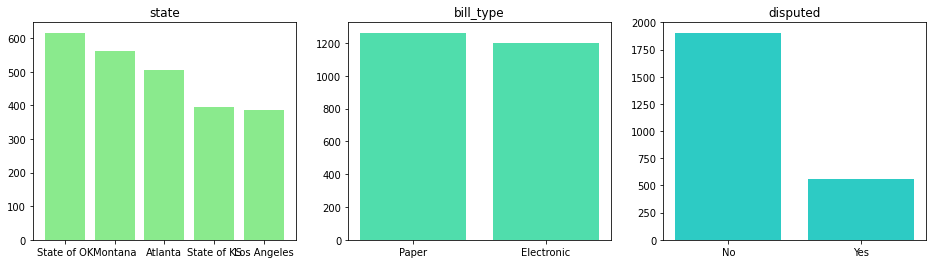

In [0]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize=(16, 4))

for ax, col, color in zip(axes.flat, ['state', 'bill_type', 'disputed'], ['#8AEA8D', '#50DDAC', '#2DCBC4']):
  ax.bar(x = data[col].value_counts().index, height = data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.grid(False)
plt.show()

**Observation:**

- **state** and **disputed** is **having positive distribution** of values.
- **bill_type** is **almost normally distributed**.

### **Pre-Profiling Report**

In [0]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Pre Profiling.html')
print('Accomplished!')

Accomplished!


**Observation:**

- **Report shows** data has **5 numeric** and **8 categorical features**.
- **cust_id** has **high cardinality** with **100 distinct values**.
- **bill_date** has **high cardinality** with **91 distinct values**.
- **invoice_init_date** has **high cardinality** with **681 distinct values**.
- **invoice_settled_date** has **high cardinality** with **695 distinct values**.
- **days_late** **contains 64.4% of zeros** signifying that **~64% of people were not late in their payments**.
- From the **correlation analysis performed** by pandas, we can **see that days_to_settle is highly correlated with days_late**.

<a id = Section5></a>
# **4. Data Pre-Processing**

### **Identification & Handling of Inconsistent Data Types** 

From the above we saw that **bill_date, invoice_init_date, invoice_final_date, invoice_settled_date are categorzied as categorical features. So we will change their types to datetime.**

- Below we shall **create a frame of each type** of feature and **show you** how our **data** looks **before and after making changes**.
- After that we **shall re-run the dataframe** to identify the correct types of features.

**Before changes: Data types and respective incorrect data**

In [0]:
# Dataframe before performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
Type,object,object,int64,object,object,int64,float64,object,object,object,object,int64,int64


In [0]:
# Data before performing changes
data[['bill_date', 'invoice_init_date', 'invoice_final_date', 'invoice_settled_date']].head()

,bill_date,invoice_init_date,invoice_final_date,invoice_settled_date
0,28-04-2013,12-04-2013,12-05-2013,17-04-2013
1,16-03-2013,25-04-2013,25-05-2013,03-06-2013
2,10-01-2013,30-08-2013,29-09-2013,17-09-2013
3,08-07-2013,09-05-2012,08-06-2012,02-06-2012
4,29-07-2013,21-07-2013,20-08-2013,06-08-2013


**Performing Correction**

In [0]:
data['bill_date'] = pd.to_datetime(data['bill_date'])
data['invoice_init_date'] = pd.to_datetime(data['invoice_init_date'])
data['invoice_final_date'] = pd.to_datetime(data['invoice_final_date'])
data['invoice_settled_date'] = pd.to_datetime(data['invoice_settled_date'])

**After changes: Data types and respective incorrect data**

In [0]:
# Dataframe after performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
Type,object,object,int64,datetime64[ns],object,int64,float64,datetime64[ns],datetime64[ns],datetime64[ns],object,int64,int64


In [0]:
# Data after performing changes
data[['bill_date', 'invoice_init_date', 'invoice_final_date', 'invoice_settled_date']].head()

,bill_date,invoice_init_date,invoice_final_date,invoice_settled_date
0,2013-04-28,2013-12-04,2013-12-05,2013-04-17
1,2013-03-16,2013-04-25,2013-05-25,2013-03-06
2,2013-10-01,2013-08-30,2013-09-29,2013-09-17
3,2013-08-07,2012-09-05,2012-08-06,2012-02-06
4,2013-07-29,2013-07-21,2013-08-20,2013-06-08


### **Identification & Handling of Missing Data**

In [0]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame(data = data.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

Data Shape: (2466, 13)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
Frequency,0,0,0,0,0,0,0,0,0,0,0,0,0


It turns out there are **no null values**, but we need to **identify whether** there are **zeros present** with respect to each features **or not**.

In [0]:
print('Data Shape:', data.shape)
zero_frame = pd.DataFrame(data[data == 0].count(), columns = ['Count'])
zero_frame.transpose()

Data Shape: (2466, 13)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
Count,0,0,0,0,0,0,0,0,0,0,0,4,1589


**Observation:**

- It turns out there are **4 zeros** in days_to_settle & **1589 zeros in days_late**.
- But let's **see** what happened with **these four transactions**.

In [0]:
data[data['days_to_settle'] == 0]

,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
201,9286-VLKMI,State of KS,897,2013-02-13,Electronic,7722226334,51.55,2013-10-06,2013-10-07,2013-10-06,No,0,0
1401,9286-VLKMI,State of KS,897,2013-02-13,Electronic,7679449609,47.39,2013-06-03,2013-05-04,2013-06-03,No,0,0
1963,3271-HYHDN,Los Angeles,818,2013-04-28,Electronic,5584805665,71.02,2013-07-23,2013-08-22,2013-07-23,No,0,0
1974,3271-HYHDN,Los Angeles,818,2013-04-28,Electronic,367399005,58.78,2013-10-08,2013-09-09,2013-10-08,No,0,0


**Observation:**

- We can see that the **invoice intital date and invoice settle date is same** **signifying** that **invoice was settled on the same date** and **that's why they were not late**. 
- This is **not incorrect value**, we can either drop these four records or keep it. But we **will drop these four records**. 

In [0]:
# Dropping records where days_to_settle = 0
print('Data Shape [Before]:', data.shape)
data = data[data['days_to_settle'] != 0]
print('Data Shape [After]:', data.shape)

Data Shape [Before]: (2466, 13)
Data Shape [After]: (2462, 13)


### **Identification & Handling of Duplicate Rows**

- Let's identify **whether there duplicate rows present in the data or not**.
- We can **create an another frame excluding cust_id and invoice_id** to identify the duplicacy.

In [0]:
data2 = data.drop(labels = ['cust_id', 'invoice_id'], axis = 1)
data2.duplicated().any()

False

**Observation:**

- It turns out that there **aren't any duplicate rows present** in our data.

### **Identification & Handling of Duplicate Columns**

- Let's identify **whether there are any duplicate columns** in our data or not.
- We have made a **custom function to identify all the columns** with **similar values**. 

In [0]:
def duplicateCols(dataframe):
  '''Get a list of Duplicate valued Columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

In [0]:
is_duplicate_cols = duplicateCols(data2)
print('Contains Duplicate Features?', is_duplicate_cols)

Contains Duplicate Features? None


**Observation:**

- It turns out that there are **no duplicate columns** in our data.

### **Post Profiling Report**

In [0]:
profile = ProfileReport(df = data)
profile.to_file(output_file = 'Post Profiling.html')
print('Accomplished!')

Accomplished!


**Observation:**

- Report shows that **there are 6 numeric, 4 categorical and 4 datetime features**.
- **Rest** there is **no change than before**.

<a id = Section6></a>
# **5. Exploratory Data Analysis**

In [0]:
print('Data Shape:', data.shape)
data.head()

Data Shape: (2462, 13)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late
0,3271-HYHDN,Los Angeles,818,2013-04-28,Paper,354407690,45.56,2013-12-04,2013-12-05,2013-04-17,No,5,0
1,1604-LIFKX,Los Angeles,818,2013-03-16,Electronic,3693123052,47.82,2013-04-25,2013-05-25,2013-03-06,No,39,9
2,6160-HCSFI,State of OK,391,2013-10-01,Electronic,4026967253,69.48,2013-08-30,2013-09-29,2013-09-17,No,18,0
3,9883-SDWFS,State of KS,897,2013-08-07,Paper,1491017498,19.23,2012-09-05,2012-08-06,2012-02-06,No,24,0
4,3676-CQAIF,State of KS,897,2013-07-29,Paper,2137157897,20.55,2013-07-21,2013-08-20,2013-06-08,No,16,0


- We will **create some new features** out of the exisiting ones which **can help out in our analysis**.
- These will be -
  - **late:** It will shows whether a customer was late or not.
  - **count_late:**It will shows the number of time a certain customer was late.
  - **invoice_quater** It signifies quarter of the date in invoice_init_date.
  - **repeat_cust** It will shows the frequency of repeated customer.
  - **binned_invoice_amount:** This feature is derived from invoice amount signifying categories of invoice amount i.e. Less than 60 or Greater than 60.

In [0]:
data['late'] = data['days_late'].apply(lambda x: 1 if x>0 else 0)
data['count_late'] = data['late'].eq(1).groupby(data['cust_id']).apply(lambda x: x.cumsum().shift().fillna(0)).astype(int)
data['invoice_quater'] = data['invoice_init_date'].dt.quarter
# For frequency of repeated customer
temp_data = data[data['late'] == 1].groupby(['cust_id'], as_index = False)['days_late'].count()
temp_data.columns = ['cust_id', 'repeat_cust']
data = pd.merge(data, temp_data, how = 'left', on = 'cust_id')
data['repeat_cust'].fillna(0, inplace=True)
data['repeat_cust'] = data['repeat_cust'].astype('int')
data['binned_invoice_amount'] = data['invoice_amount'].apply(lambda x: 'More than 60' if x > 69 else 'Less than 60')

In [0]:
print('Data Shape:', data.shape)
data.head()

Data Shape: (2462, 18)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,3271-HYHDN,Los Angeles,818,2013-04-28,Paper,354407690,45.56,2013-12-04,2013-12-05,2013-04-17,No,5,0,0,0,4,0,Less than 60
1,1604-LIFKX,Los Angeles,818,2013-03-16,Electronic,3693123052,47.82,2013-04-25,2013-05-25,2013-03-06,No,39,9,1,0,2,20,Less than 60
2,6160-HCSFI,State of OK,391,2013-10-01,Electronic,4026967253,69.48,2013-08-30,2013-09-29,2013-09-17,No,18,0,0,0,3,1,More than 60
3,9883-SDWFS,State of KS,897,2013-08-07,Paper,1491017498,19.23,2012-09-05,2012-08-06,2012-02-06,No,24,0,0,0,3,23,Less than 60
4,3676-CQAIF,State of KS,897,2013-07-29,Paper,2137157897,20.55,2013-07-21,2013-08-20,2013-06-08,No,16,0,0,0,3,15,Less than 60


**<h4>Question 1:** What is the **average frequency** of getting **late** with respect to **area code**?</h4>

In [0]:
average_late = data.groupby(['area_code'], as_index = False)['days_late'].mean()
average_late.set_index('area_code', inplace = True)
average_late.columns = ['Average Days Late']
average_late.transpose()

area_code,391,406,770,818,897
Average Days Late,1.853896,3.941176,3.642292,4.841558,3.626904


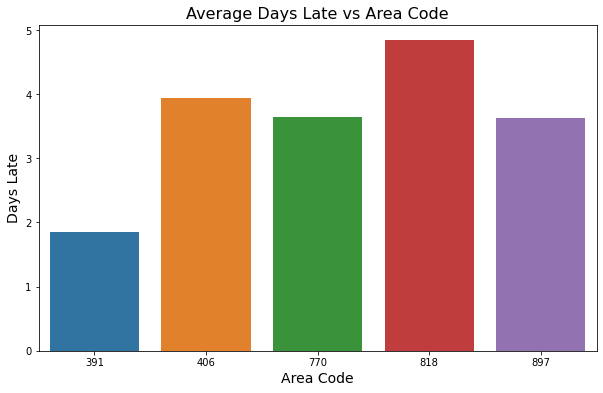

In [0]:
data2 = pd.DataFrame(data.groupby(['area_code'], as_index = False)['days_late'].mean())
plt.figure(figsize = [10, 6])
sns.barplot(x = 'area_code', y = 'days_late', data = data2, linewidth = 2.5)
plt.xlabel('Area Code', size = 14)
plt.ylabel('Days Late', size = 14)
plt.title('Average Days Late vs Area Code', size = 16)
plt.show()

**Observation:**

- It can be seen that **area code 818** is having **maximum late days** while **mimium late days** are for area **391**.

**<h4>Question 2:** What is the **proportion** of **transactions** with respect to being **late or not**?</h4>

Late Transactions: 877
On Time Transactions: 1585


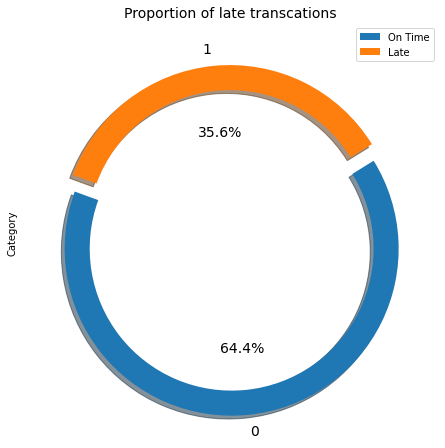

In [0]:
print('Late Transactions:', len(data[data['late'] == 1]))
print('On Time Transactions:', len(data[data['late'] == 0]))

data['late'].value_counts().plot(kind = 'pie', explode = [0.1, 0], fontsize = 14, autopct = '%3.1f%%', 
                                 wedgeprops = dict(width=0.15), shadow = True, startangle = 160, 
                                 figsize = [13.66, 7.68], legend = True)
plt.legend(['On Time', 'Late'])
plt.ylabel('Category')
plt.title('Proportion of late transcations', size = 14)
plt.show()

**Observation:**

- Around **35.6% of customers are found to be late**.

**<h4>Question 3:** What is the **average frequency** of **repeated transactions** with **respect to days late**?</h4>

In [0]:
repeat_frame = data.groupby(['repeat_cust'], as_index = False)['days_late'].mean()
repeat_frame.set_index('repeat_cust', inplace = True)
repeat_frame.columns = ['Average Days Late']
repeat_frame.transpose()

repeat_cust,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,25,26,32
Average Days Late,0.0,0.170507,0.36246,0.531915,1.333333,1.053922,1.578313,2.290323,2.66,2.407407,3.833333,3.0,4.851852,4.104762,7.307692,6.2,8.113636,5.903226,3.322581,9.652778,11.236364,5.085714,8.614458,9.948276,10.741379,14.441176


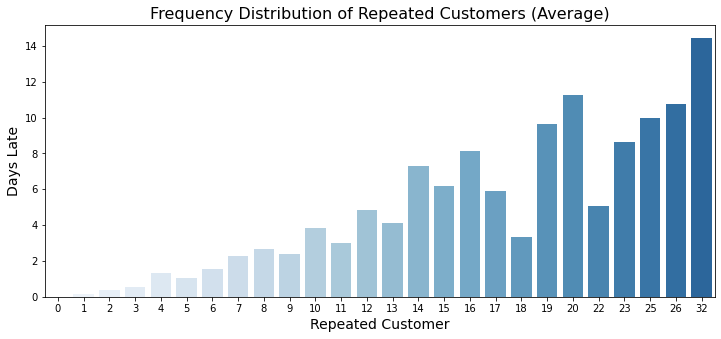

In [0]:
data_temp = pd.DataFrame(data.groupby(['repeat_cust'], as_index = False)['days_late'].mean())
plt.figure(figsize = [12, 5])
sns.barplot(x = 'repeat_cust', y = 'days_late', data = data_temp, palette = sns.color_palette("Blues", n_colors= 32))
plt.xlabel('Repeated Customer', size = 14)
plt.ylabel('Days Late', size = 14)
plt.title('Frequency Distribution of Repeated Customers (Average)', size = 16)
plt.show()

**Observation:**

- We can see a **positive trend** **with the increasing number of customers** i.e. with the **increase in repeated customers the payments are late**.

**<h4>Question 4:** What is the **average frequency** of days **late** with respect to **invoice amount**?</h4>

In [0]:
bin_inv_amt_frame = data.groupby(['binned_invoice_amount'], as_index = False)['days_late'].mean()
bin_inv_amt_frame.set_index('binned_invoice_amount', inplace = True)
bin_inv_amt_frame.columns = ['Average Days Late']
bin_inv_amt_frame.transpose()

binned_invoice_amount,Less than 60,More than 60
Average Days Late,3.18568,3.979115


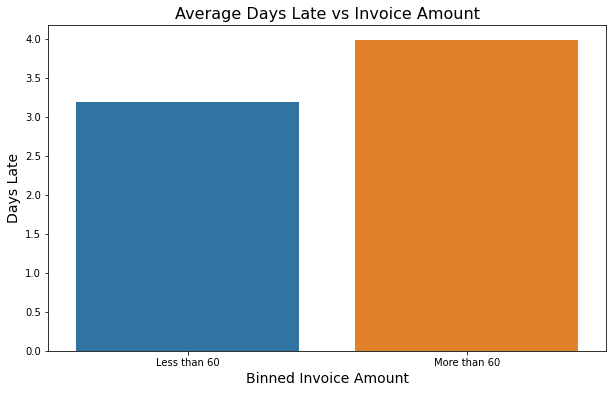

In [0]:
temp_data = pd.DataFrame(data.groupby(['binned_invoice_amount'], as_index = False)['days_late'].mean())
plt.figure(figsize = [10, 6])
sns.barplot(x = 'binned_invoice_amount', y = 'days_late', data = temp_data)
plt.xlabel('Binned Invoice Amount', size = 14)
plt.ylabel('Days Late', size = 14)
plt.title('Average Days Late vs Invoice Amount', size = 16)
plt.show()

**Observation:**

- On average almost **~4 days customers are late for more than 60** invoice amount while **for less than 60** invoice amount **customers are around 3 days late**.

**<h4>Question 5:** What is the **rate** of being **late** with respect to **bill_date**?</h4>

In [0]:
bill_frame = pd.DataFrame(data.groupby(by = ['bill_date', 'late']).size(), columns = ['Count'])
bill_frame.transpose()

bill_date 2012-01-26 2012-02-08     2012-02-21    2012-03-03     2012-03-17  \
late               0          0   1          0  1          0   1          0   
Count             24          5  25         24  6         42  16         13   

bill_date     2012-03-18     2012-04-04    2012-04-06 2012-04-07     \
late        1          0   1          0  1          0          0  1   
Count      13          5  17         19  5         17         18  3   

bill_date 2012-04-22    2012-04-23    2012-04-30     2012-05-08    2012-05-12  \
late               0  1          0  1          0   1          0  1          0   
Count             27  1         17  4         32  25         21  7          5   

bill_date     2012-05-19 2012-05-22     2012-05-31     2012-06-02      \
late        1          0          0   1          0   1          0   1   
Count      26         21          5  16          2  20          3  20   

bill_date 2012-06-04     2012-06-17    2012-06-20    2012-06-24      \
late               0   1          0  1          0  1          0   1   
Count              2  17         21  2         23  5          2  32   

bill_date 2012-07-13    2012-07-31    2012-08-24     2012-08-29 2012-09-01     \
late               0  1          0  1          0   1          0          0  1   
Count             28  2         21  2         22  11         20         26  2   

bill_date 2012-09-07     2012-09-14     2012-09-15     2012-09-24      \
late               0   1          0   1          0   1          0   1   
Count             15  12          7  16          5  23          1  14   

bill_date 2012-09-28     2012-09-29    2012-10-08     2012-10-11     \
late               0   1          0  1          0   1          0  1   
Count             13  18         16  5          8  15         14  7   

bill_date 2012-10-12 2012-10-19 2012-10-26 2012-11-09    2012-11-11     \
late               0          0          0          0  1          0  1   
Count             22         26         21         55  3         26  2   

bill_date 2012-11-21 2012-11-26    2012-11-27    2012-12-11    2012-12-15      \
late               0          0  1          0  1          0  1          0   1   
Count             19         37  9         21  8         20  1          4  17   

bill_date 2012-12-31     2013-01-09 2013-01-22     2013-02-04    2013-02-13  \
late               0   1          0          0   1          0  1          0   
Count             37  13         18         13  22         14  5         32   

bill_date 2013-03-01    2013-03-04    2013-03-06    2013-03-08    2013-03-16  \
late               0  1          0  1          0  1          0  1          1   
Count             18  2         27  1         23  3         15  7         20   

bill_date 2013-03-19     2013-04-03     2013-04-04     2013-04-09     \
late               0   1          0   1          0   1          0  1   
Count             26  15         12  14         22  13         28  2   

bill_date 2013-04-28 2013-04-30    2013-05-07     2013-06-04    2013-06-06     \
late               0          0  1          0   1          0  1          0  1   
Count             16         31  5          4  19         26  1         23  6   

bill_date 2013-06-11    2013-06-20     2013-06-27     2013-07-15     \
late               0  1          0   1          0   1          0  1   
Count             21  2         14  11          3  25         13  8   

bill_date 2013-07-19    2013-07-29     2013-07-31 2013-08-01 2013-08-03      \
late               0  1          0   1          0          0          0   1   
Count             14  9          2  15         16         20          7  19   

bill_date 2013-08-05     2013-08-07     2013-08-15    2013-08-28      \
late               0   1          0   1          0  1          0   1   
Count             12  14          8  23         23  5          6  13   

bill_date 2013-08-29     2013-09-04     2013-09-08     2013-09-10      \
late               0   1          0   1    

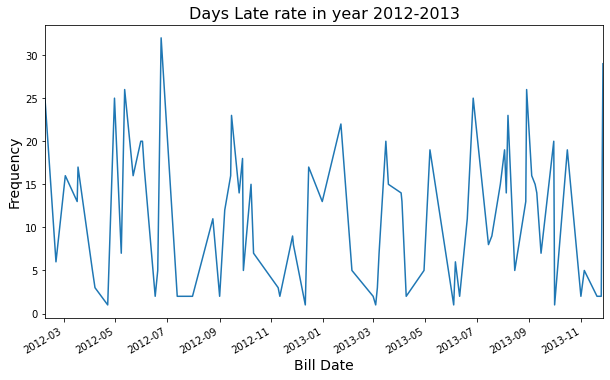

In [0]:
figure = plt.figure(figsize = [10, 6])
data[data['late'] == 1]['bill_date'].value_counts().plot(kind = 'line')
plt.xlabel('Bill Date', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Days Late rate in year 2012-2013', size = 16)
plt.show()

**Observation:**
- We **could not find a pattern**, so we can consider that **billing has happened in a random fashion**.

**<h4>Question 6:** What is the **frequency** of **Area code** with resepect to **late**?</h4>

In [0]:
area_frame = pd.DataFrame(data.groupby(by = ['area_code', 'late']).size(), columns = ['Frequency'])
area_frame.transpose()

area_code  391       406       770       818       897     
late         0    1    0    1    0    1    0    1    0    1
Frequency  459  157  328  233  310  196  225  160  263  131

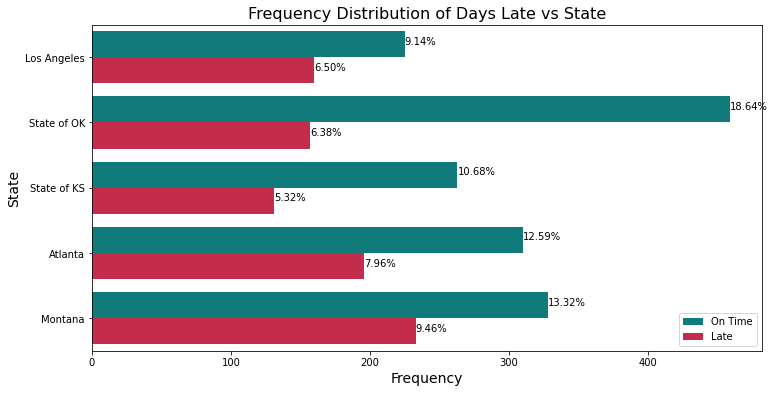

In [0]:
figure = plt.figure(figsize = [12, 6])
ax = sns.countplot(y = 'state',  data = data, hue = 'late', palette = ['darkcyan', 'crimson'])
total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.xlabel('Frequency', size = 14)
plt.ylabel('State', size = 14)
plt.title('Frequency Distribution of Days Late vs State', y = 1, size = 16)
ax.legend(labels = ['On Time', 'Late'], loc = 'lower right')
plt.show()

**Observation:**

- **Around 9% of the customer were late from Montana state** more than any other state.
- On the other hand **~18% of customer wer not late from the state of OK**.

**<h4>Question 7:** What is the **frequency** of **bill type** with resepect to **late**?</h4>

In [0]:
data['bill_type'].value_counts()

Paper         1263
Electronic    1199
Name: bill_type, dtype: int64

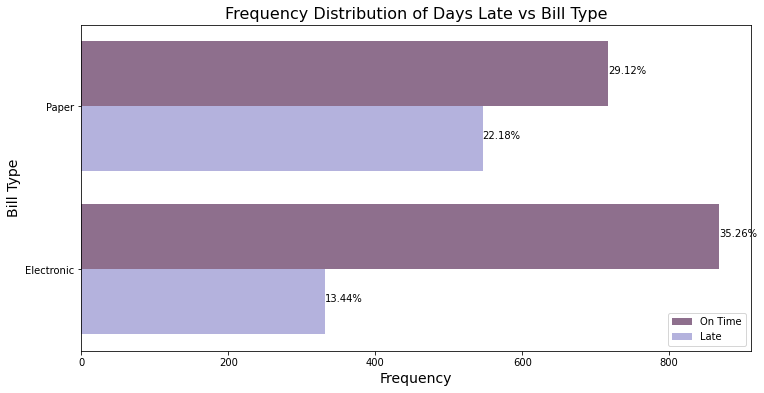

In [0]:
figure = plt.figure(figsize = [12, 6])
ax = sns.countplot(y= 'bill_type',  data = data, hue = 'late', palette = ['#936A92', '#AEABE4'])
total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.xlabel('Frequency', size = 14)
plt.ylabel('Bill Type', size = 14)
ax.legend(labels = ['On Time', 'Late'], loc = 'lower right')
plt.title('Frequency Distribution of Days Late vs Bill Type', y=1, size = 16)
plt.show()

**Observation:**

- Around 3**5% of bills were generated digitally** out of 1199 electronic bills, **which were paid on time** while there are **13% bills which were remained unpaid**.
- Around **29% of bills were made of paper** out of 1263 **which were paid on time** while there are a**round 22% of bills which were unpaid**.

**<h4>Question 8:** What is the **frequency** of **Disputed** with resepect to **late**?</h4>

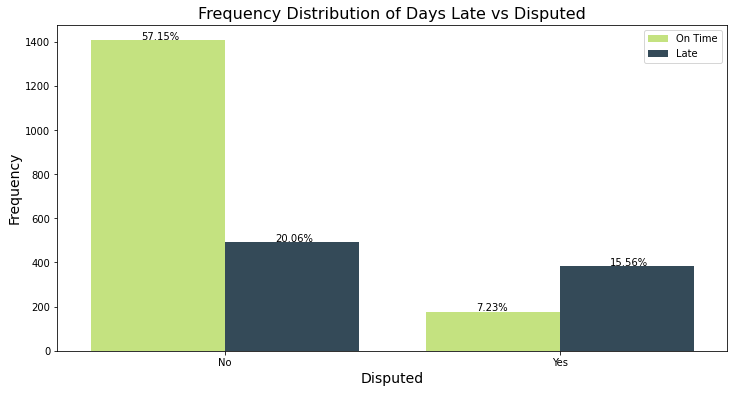

In [0]:
figure = plt.figure(figsize = [12, 6])
ax = sns.countplot(x = 'disputed',  data = data, hue = 'late', palette = ['#CAF270', '#2E4B5E'])
total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.15
        y = p.get_y() + p.get_height() + 3
        ax.annotate(percentage, (x, y))
plt.xlabel('Disputed', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Distribution of Days Late vs Disputed', y = 1, size = 16)
ax.legend(labels = ['On Time', 'Late'], loc = 'upper right')
plt.show()

**Observation:**

- From above it can be easily visualized that **customers who didn't disputed are found to be more late** than the customers who disputed.
- Additionally, we can see that **customers who disputed, paid amount on time, are very few** as **comparison** to the **customer who didn't disputed at all**.

In the **following code** we have **converted the customer id to integer value** which shall simplify our analysis.

In [0]:
labels = data['cust_id'].astype('category').cat.categories.tolist()
print('Sample Labels:', labels[0:4])
# Creating Dictionary of cust_id values
data_map = {'cust_id' : {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}}
# Replacing cust_id with integer values
data.replace(data_map, inplace=True)
data.head()

Sample Labels: ['0187-ERLSR', '0379-NEVHP', '0465-DTULQ', '0625-TNJFG']


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,23,Los Angeles,818,2013-04-28,Paper,354407690,45.56,2013-12-04,2013-12-05,2013-04-17,No,5,0,0,0,4,0,Less than 60
1,13,Los Angeles,818,2013-03-16,Electronic,3693123052,47.82,2013-04-25,2013-05-25,2013-03-06,No,39,9,1,0,2,20,Less than 60
2,51,State of OK,391,2013-10-01,Electronic,4026967253,69.48,2013-08-30,2013-09-29,2013-09-17,No,18,0,0,0,3,1,More than 60
3,99,State of KS,897,2013-08-07,Paper,1491017498,19.23,2012-09-05,2012-08-06,2012-02-06,No,24,0,0,0,3,23,Less than 60
4,29,State of KS,897,2013-07-29,Paper,2137157897,20.55,2013-07-21,2013-08-20,2013-06-08,No,16,0,0,0,3,15,Less than 60


**<h4>Question 9:** What is the average **invoice amount** left to be paid **per state**?</h4>

In [0]:
invoice_amt_frame = data.groupby(by = ['state'], as_index = False)['invoice_amount'].mean()
invoice_amt_frame.set_index('state', inplace = True)
invoice_amt_frame.columns = ['Average Invoice Amount']
invoice_amt_frame.transpose()

state,Atlanta,Los Angeles,Montana,State of KS,State of OK
Average Invoice Amount,54.112194,63.304571,70.272567,41.242487,65.014545


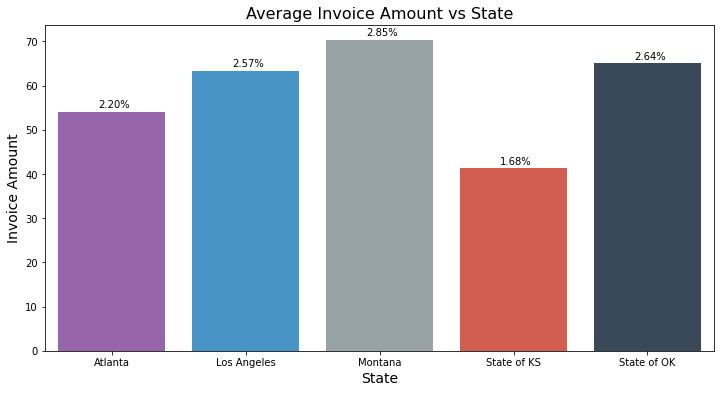

In [0]:
df = data.groupby(by = ['state'], as_index = False)['invoice_amount'].mean()
plt.figure(figsize = [12, 6])
ax = sns.barplot(x = 'state', y = 'invoice_amount', data = df, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.3
        y = p.get_y() + p.get_height() + 1
        ax.annotate(percentage, (x, y))
plt.xlabel('State', size = 14)
plt.ylabel('Invoice Amount', size =14)
plt.title('Average Invoice Amount vs State', size = 16)
plt.show()

**Observation:**

- On average state of **Montana is found to have 2.85% of invoice amount yet to pay** i.e. **around $\$$70 thousand dollars**.

<a id = Section7></a>
# **6. Post Data Processing & Feature Selection**

In [0]:
print(data.shape)
data.head()

(2462, 18)


,cust_id,state,area_code,bill_date,bill_type,invoice_id,invoice_amount,invoice_init_date,invoice_final_date,invoice_settled_date,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,23,Los Angeles,818,2013-04-28,Paper,354407690,45.56,2013-12-04,2013-12-05,2013-04-17,No,5,0,0,0,4,0,Less than 60
1,13,Los Angeles,818,2013-03-16,Electronic,3693123052,47.82,2013-04-25,2013-05-25,2013-03-06,No,39,9,1,0,2,20,Less than 60
2,51,State of OK,391,2013-10-01,Electronic,4026967253,69.48,2013-08-30,2013-09-29,2013-09-17,No,18,0,0,0,3,1,More than 60
3,99,State of KS,897,2013-08-07,Paper,1491017498,19.23,2012-09-05,2012-08-06,2012-02-06,No,24,0,0,0,3,23,Less than 60
4,29,State of KS,897,2013-07-29,Paper,2137157897,20.55,2013-07-21,2013-08-20,2013-06-08,No,16,0,0,0,3,15,Less than 60


### **Features Correlation**

In this section we will **analyze how features are associated with each other**.

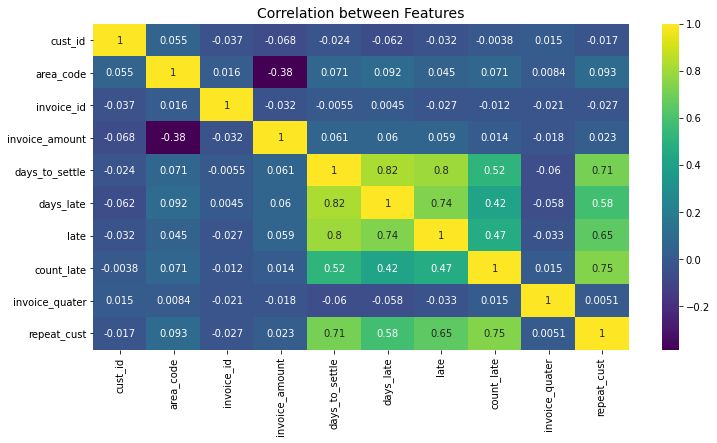

In [0]:
figure = plt.figure(figsize = [12, 6])
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')
plt.title('Correlation between Features', size = 14)
plt.show()

**Observation:**

* **days_to_settle** is **highly correlated** to **days_ate, late, repeat_cust**.
* **days_late** is **highly correlated** to **late**.
* **count_late** is highly correlated to **repeat_cust**.
* **repeat_cust** is **highly correlated** to **late & days_to_settle**.

- We will **drop out cust_id, area_code, invoice_id, bill_date, invoice_init_date, invoice_final_date, invoice_settled_date** as they are not useful for prediction.
- **Reason of dropping is we are working with regression problem instead of time series**, so date features are not useful while using machine learning algorithms.

In [0]:
ls = ['cust_id', 'area_code', 'invoice_id', 'bill_date', 'invoice_init_date', 'invoice_final_date', 'invoice_settled_date']
print('Data Shape [Before]:', data.shape)
data.drop(labels = ls, axis = 1, inplace = True)
print('Data Shape [After]:', data.shape)
data.head()

Data Shape [Before]: (2462, 18)
Data Shape [After]: (2462, 11)


,state,bill_type,invoice_amount,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,Los Angeles,Paper,45.56,No,5,0,0,0,4,0,Less than 60
1,Los Angeles,Electronic,47.82,No,39,9,1,0,2,20,Less than 60
2,State of OK,Electronic,69.48,No,18,0,0,0,3,1,More than 60
3,State of KS,Paper,19.23,No,24,0,0,0,3,23,Less than 60
4,State of KS,Paper,20.55,No,16,0,0,0,3,15,Less than 60


- Next we **shall create a copy of our original cleansed data**.
- We shall **perform encoding on this copy of data** and generate dummy features and perform correlation analysis again.
- We can perform **label encoding on bill_type, disputed, binned_invoice_amount** as they are ordered features 
- **One hot encoding on state** as it is unordered in nature.

In [0]:
data_encoded = data.copy()

### **Performing Label Encoding**

As mentioned before, **we shall encode bill_type, disputed, binned_invoice_amount**.

In [0]:
ordered_labels = ['bill_type', 'disputed', 'binned_invoice_amount']
encode = LabelEncoder()

for i in ordered_labels:
  if isinstance(data[i].dtype, object):
    data_encoded[i] = encode.fit_transform(data_encoded[i])
print('Label Encoding Success!')
print('Data Shape:', data_encoded.shape)
data_encoded.head()

Label Encoding Success!
Data Shape: (2462, 11)


,state,bill_type,invoice_amount,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,Los Angeles,1,45.56,0,5,0,0,0,4,0,0
1,Los Angeles,0,47.82,0,39,9,1,0,2,20,0
2,State of OK,0,69.48,0,18,0,0,0,3,1,1
3,State of KS,1,19.23,0,24,0,0,0,3,23,0
4,State of KS,1,20.55,0,16,0,0,0,3,15,0


### **Performing Dummification**

As mentioned before we shall make **dummy features** out of **state feature**.

In [0]:
data_encoded = pd.get_dummies(data = data_encoded, columns = ['state'])
print('Data Shape:', data_encoded.shape)
data_encoded.head()

Data Shape: (2462, 15)


,bill_type,invoice_amount,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount,state_Atlanta,state_Los Angeles,state_Montana,state_State of KS,state_State of OK
0,1,45.56,0,5,0,0,0,4,0,0,0,1,0,0,0
1,0,47.82,0,39,9,1,0,2,20,0,0,1,0,0,0
2,0,69.48,0,18,0,0,0,3,1,1,0,0,0,0,1
3,1,19.23,0,24,0,0,0,3,23,0,0,0,0,1,0
4,1,20.55,0,16,0,0,0,3,15,0,0,0,0,1,0


Let's **visualize the correlation again**.

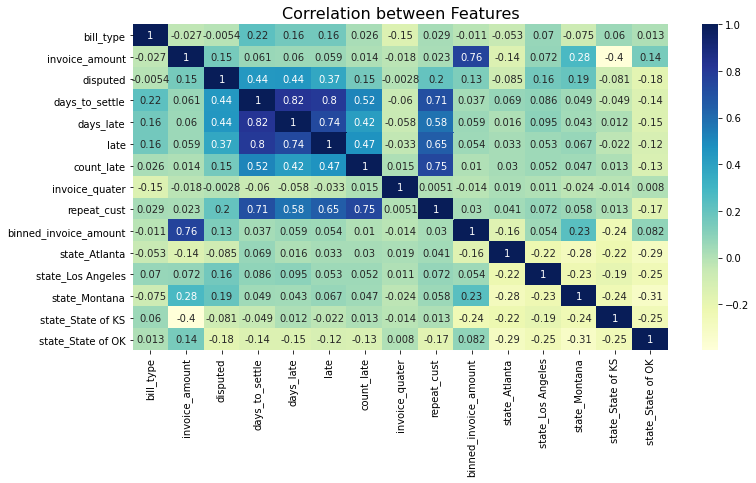

In [0]:
figure = plt.figure(figsize = [12, 6])
sns.heatmap(data_encoded.corr(), annot = True, cmap = 'YlGnBu')
plt.title('Correlation between Features', size = 16)
plt.show()

**Observation:**

- **Highly Correlated:**
  - days_late &lrarr; days_to_settle
  - days_to_settle &lrarr; late, days_late
- **Moderately Correlated:**
  - invoice_amount &lrarr; binned_invoice_amount.
  - days_to_settle &lrarr; repeat_cust, count_late.
  - days_late &lrarr; repeat_cust, late.
  - late &lrarr; repeat_cust.
  - count_late &lrarr; repeat_cust.


**Now we will break our data into input and respective target.**

In [0]:
X, y = data_encoded.drop('days_late', axis = 1), data_encoded['days_late']
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (2462, 14)
y Shape: (2462,)


**Splitting our data to train-set and test-set**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **Feature Selection using Random Forest**

- **Random forests** are one the most **popular machine learning algorithms**. - They **provide**,
 - **a good predictive performance**,
 -**low overfitting and**
 -**easy interpretability.** 
-This interpretability **derives** the **importance of each feature** on the tree decision. In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

In [0]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

Total Features Selected are 1
Features: Index(['days_to_settle'], dtype='object')


**Observation:**

- It turns out that model **estimated only one feature** which is **important**. 
- Instead we will **analyze manually** and **choose important features** to **verify that whether it is right or not** using Pearson Correlation and ANOVA.

In [0]:
data.head()

,state,bill_type,invoice_amount,disputed,days_to_settle,days_late,late,count_late,invoice_quater,repeat_cust,binned_invoice_amount
0,Los Angeles,Paper,45.56,No,5,0,0,0,4,0,Less than 60
1,Los Angeles,Electronic,47.82,No,39,9,1,0,2,20,Less than 60
2,State of OK,Electronic,69.48,No,18,0,0,0,3,1,More than 60
3,State of KS,Paper,19.23,No,24,0,0,0,3,23,Less than 60
4,State of KS,Paper,20.55,No,16,0,0,0,3,15,Less than 60


### **Pearson Correlation**

- Pearson correlation is generally **used when both target and predictor features contain values of numerical type**.
- We want **Pearson Coef. value high** as much as possible while **p-value close to 0**.

In [0]:
ls = ['invoice_amount', 'days_to_settle', 'count_late', 'invoice_quater', 'repeat_cust']
correlation = pd.DataFrame(np.abs([stats.pearsonr(data[i], data['days_late']) for i in ls]), index = ls, columns = ['Pearson Coef.', 'p-value'])
correlation.transpose()

,invoice_amount,days_to_settle,count_late,invoice_quater,repeat_cust
Pearson Coef.,0.059887,0.82192,4.165976e-01,0.058046,5.827379e-01
p-value,0.002952,0.00000,5.754157e-104,0.003963,6.557065e-224


**Observation:**

- It comes out **only potential feature in numerical predictor is days_to_settle** as showing ~82% of dependency on target feature with p-value = 0.

### **ANOVA (Analysis of Variance)**

- ANOVA is used when there is **one categorical feature and one numerical feature**.
- We estimate **F score (should be greater than 1)** and **p-value (should be close to 0)**.

**ANOVA on State Feature**

In [0]:
# ANOVA for state feature
grouped_test = data[['state', 'days_late']].groupby(['state'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('State of OK')['days_late'],
                                  grouped_test.get_group('Montana')['days_late'],
                                  grouped_test.get_group('Atlanta')['days_late'],
                                  grouped_test.get_group('State of KS')['days_late'],
                                  grouped_test.get_group('Los Angeles')['days_late'])
print('F-Score:', F_score, 'p-value:', p_value)

F-Score: 16.040215166125794 p-value: 5.690752192502127e-13


**ANOVA on Bill Type Feature**

In [0]:
# ANOVA for bill_type feature
grouped_test = data[['bill_type', 'days_late']].groupby(['bill_type'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('Paper')['days_late'], 
                                  grouped_test.get_group('Electronic')['days_late'])
print('F-Score:', F_score, 'p-value:', p_value)

F-Score: 66.80533067532483 p-value: 4.741616565876118e-16


**ANOVA on Disputed Feature**

In [0]:
# ANOVA for disputed feature
grouped_test = data[['disputed', 'days_late']].groupby(['disputed'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('No')['days_late'], 
                                  grouped_test.get_group('Yes')['days_late'])
print('F-Score:', F_score, 'p-value:', p_value)

F-Score: 600.5251096796703 p-value: 7.594656020907004e-119


**ANOVA on Late Feature**

In [0]:
# ANOVA for late feature
grouped_test = data[['late', 'days_late']].groupby(['late'])
F_score, p_value = stats.f_oneway(grouped_test.get_group(0)['days_late'], 
                                  grouped_test.get_group(1)['days_late'])
print('F-Score:', F_score, 'p-value:', p_value)

F-Score: 2917.994694926993 p-value: 0.0


**ANOVA on Binned Invoice Amount Feature**

In [0]:
# ANOVA for binned_invoice_amount feature
grouped_test = data[['binned_invoice_amount', 'days_late']].groupby(['binned_invoice_amount'])
F_score, p_value = stats.f_oneway(grouped_test.get_group('More than 60')['days_late'], 
                                  grouped_test.get_group('Less than 60')['days_late'])
print('F-Score:', F_score, 'p-value:', p_value)

F-Score: 8.685451831111926 p-value: 0.003237764864152322


**Observation:**

- Using ANOVA we found that **state, bill_type, disputed and late features are really good predictors for days_late** feature as their F-score is high and p-value is low.

Using statisitical measures such as Pearson Correlation and ANOVA we found some **potential features** that might be **helpful** in **predicting** the **number of days** a customer will be late for the payment of the receivables.

**Important Features:**

- state
- days_to_settle
- bill_type
- disputed
- late
- days_late

In [0]:
final_data = data[['state', 'days_to_settle', 'bill_type', 'disputed', 'late', 'days_late']]
print('Data Shape:', final_data.shape)
final_data.head()

Data Shape: (2462, 6)


,state,days_to_settle,bill_type,disputed,late,days_late
0,Los Angeles,5,Paper,No,0,0
1,Los Angeles,39,Electronic,No,1,9
2,State of OK,18,Electronic,No,0,0
3,State of KS,24,Paper,No,0,0
4,State of KS,16,Paper,No,0,0


**We encoded categorical features to numerics in the next section.**

In [0]:
final_data.loc[final_data['bill_type'] == 'Electronic', 'bill_type'] = 0
final_data.loc[final_data['bill_type'] == 'Paper', 'bill_type'] = 1

final_data.loc[final_data['disputed'] == 'No', 'disputed'] = 0
final_data.loc[final_data['disputed'] == 'Yes', 'disputed'] = 1

final_data = pd.get_dummies(data = final_data, columns = ['state'])
print('Final Data Shape:', final_data.shape)
final_data.head()

Final Data Shape: (2462, 10)


,days_to_settle,bill_type,disputed,late,days_late,state_Atlanta,state_Los Angeles,state_Montana,state_State of KS,state_State of OK
0,5,1,0,0,0,0,1,0,0,0
1,39,0,0,1,9,0,1,0,0,0
2,18,0,0,0,0,0,0,0,0,1
3,24,1,0,0,0,0,0,0,1,0
4,16,1,0,0,0,0,0,0,1,0


In the next section we shall **prepare data** for **model development** by slicing in **input(X) and output(y)**.

In [0]:
X = final_data.drop('days_late', axis = 1)
y = final_data['days_late'].values

Now we will **split** our **data** in **training and testing** parts.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<a id = Section8></a>
# **7. Model Development & Evaluation**

- We'll **build model using only important features (state, days_to_settle, bill_type, disputed, late, days_late)** that impact highly on our target feature i.e. days_late.
- Below we have created a function to plot the score of the model based on train set and test set.

In [0]:
def PlotScore(y_train, y_train_pred, y_test, y_test_pred):
  '''
  Plot visual of acutal and predicted for train & test data
  y_train: actual values of y train
  y_train_pred: predicted values of y_train
  y_test: actual values of y_test
  y_test_pred: predicted values of y_test
  '''
  plt.figure(figsize = [13.66, 6])
  plt.subplot(1, 2, 1)
  sns.lineplot(x = y_train, y = y_train_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Train Data')

  plt.subplot(1, 2, 2)
  sns.lineplot(x = y_test, y = y_test_pred, marker = 'o')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('For Test Data')
  plt.show()

<a id = Section81></a>
## **7.1 Linear Regression**


Acutal Values: [0 0 5 0 0]
Predicted Values: [3 2 9 4 0]
RMSE (Train Data): 3.06
RMSE (Test Data): 3.06
R-Squared (Train Data): 71.0 %
R-Squared (Test Data): 65.0 %


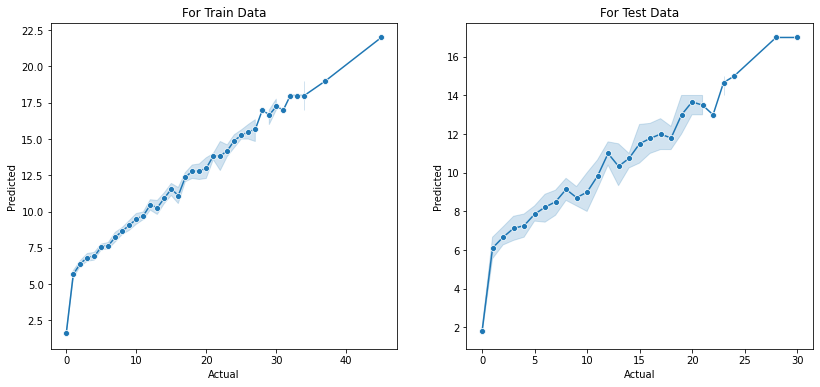

In [0]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = np.abs(lr.predict(X_train).astype('int'))
y_test_pred = np.abs(lr.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(lr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(lr.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- Our model **performed only 65% well** using test set. 
- The **difference in acutal and predicted comes out to be 3.06** which is **not good**. 
- **Let's see how the more restricted models** like Ridge & Lasso will perform.

<a id = Section82></a>
## **7.2 Ridge Regression**

Acutal Values: [0 0 5 0 0]
Predicted Values: [3 2 9 4 0]
RMSE (Train Data): 3.06
RMSE (Test Data): 3.06
R-Squared (Train Data): 71.0 %
R-Squared (Test Data): 65.0 %


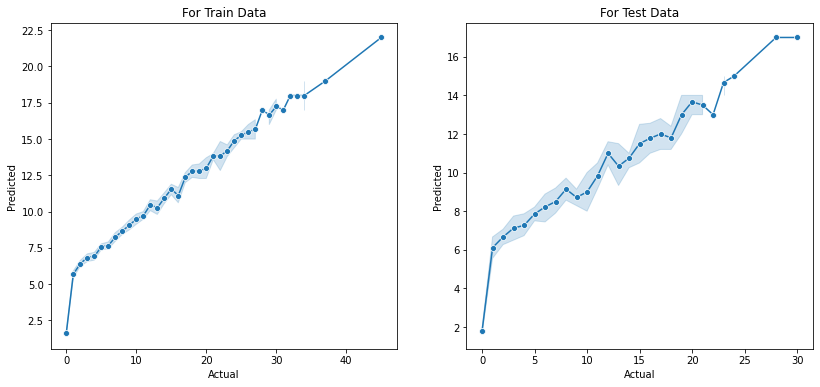

In [0]:
rr = Ridge(random_state = 42)
rr.fit(X_train, y_train)
y_train_pred = np.abs(rr.predict(X_train).astype('int'))
y_test_pred = np.abs(rr.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(rr.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(rr.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- There is **still no difference** in Ridge. 
- Maybe we **should iterate the alpha value**. Let's iterate model over some values of alpha.

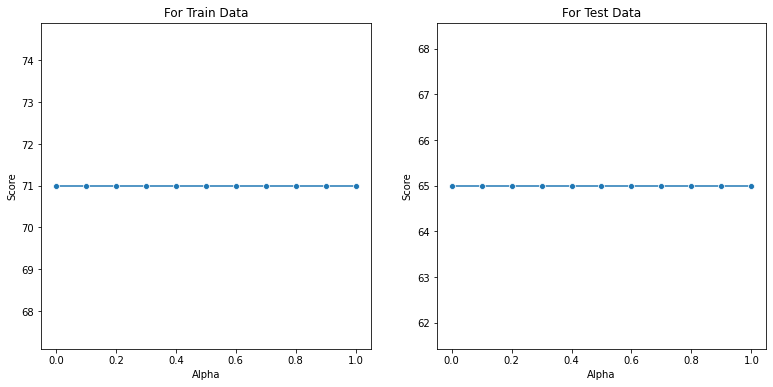

In [0]:
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_score = []
test_score = []
for i in alphas:
  rr = Ridge(alpha = i, random_state = 42)
  rr.fit(X_train, y_train)
  train_score.append(np.round(rr.score(X_train, y_train), decimals = 2)*100)
  test_score.append(np.round(rr.score(X_test, y_test), decimals = 2)*100)

plt.figure(figsize = [13, 6])
plt.subplot(1, 2, 1)
sns.lineplot(x = alphas, y = train_score, marker = 'o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('For Train Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = alphas, y = test_score, marker = 'o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('For Test Data')
plt.show()

**Observation:**

- **Still there is no change**, **we should try lasso** and see the significant behaviour of the model over this data.

<a id = Section83></a>
## **7.3 Lasso Regression**

Acutal Values: [0 0 5 0 0]
Predicted Values: [4 3 7 5 1]
RMSE (Train Data): 3.2
RMSE (Test Data): 3.2
R-Squared (Train Data): 69.0 %
R-Squared (Test Data): 62.0 %


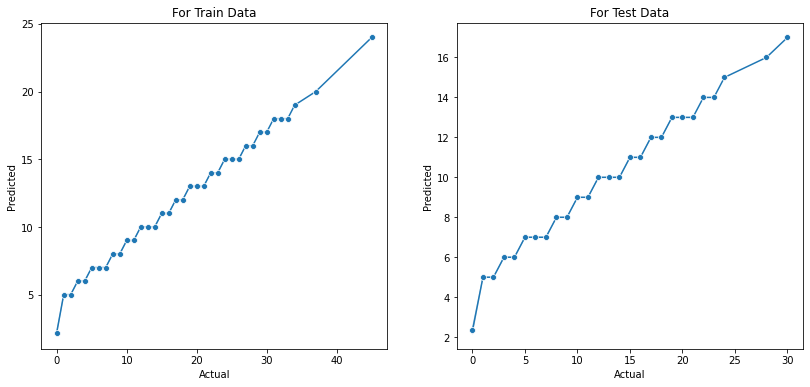

In [0]:
l_r = Lasso()
l_r.fit(X_train, y_train)
y_train_pred = np.abs(l_r.predict(X_train).astype('int'))
y_test_pred = np.abs(l_r.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(l_r.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(l_r.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- **Lasso did terible with respect to linear regression and ridge**. 
- Let's **try this model over different alpha iterations** and then evaulate it.

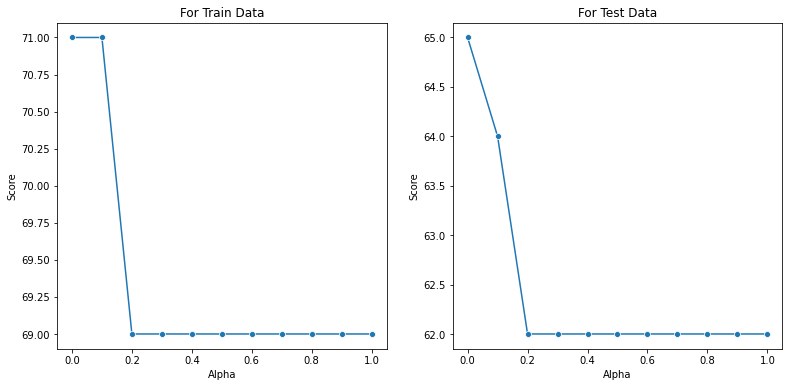

In [0]:
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
train_score = []
test_score = []
for i in alphas:
  l_r = Lasso(alpha = i, random_state = 42)
  l_r.fit(X_train, y_train)
  train_score.append(np.round(l_r.score(X_train, y_train), decimals = 2)*100)
  test_score.append(np.round(l_r.score(X_test, y_test), decimals = 2)*100)

plt.figure(figsize = [13, 6])
plt.subplot(1, 2, 1)
sns.lineplot(x = alphas, y = train_score, marker = 'o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('For Train Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = alphas, y = test_score, marker = 'o')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.title('For Test Data')
plt.show()

**Observation:**

- We can see that at **alpha = 0, model is providing its best peformance**. 
- But these **result are same as that of the previous models**. We need better model. So in next step we will try out Random Forest.

<a id = Section84></a>
## **7.4 Random Forest Regression**

Acutal Values: [0 0 5 0 0]
Predicted Values: [0 0 5 0 0]
RMSE (Train Data): 0.06
RMSE (Test Data): 0.06
R-Squared (Train Data): 100.0 %
R-Squared (Test Data): 100.0 %


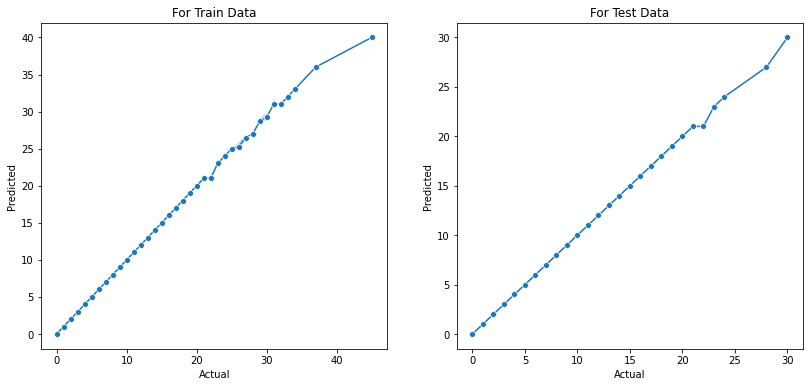

In [0]:
randomforest = RandomForestRegressor(random_state = 42)
randomforest.fit(X_train, y_train)
y_train_pred = np.abs(randomforest.predict(X_train).astype('int'))
y_test_pred = np.abs(randomforest.predict(X_test).astype('int'))

print('Acutal Values:', y_test[0:5])
print('Predicted Values:', y_test_pred[0:5])
# Estimating RMSE on Train & Test Data
print('RMSE (Train Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
print('RMSE (Test Data):', np.round(np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred)), decimals = 2))
# Estimating R-Squared on Train & Test Data
print('R-Squared (Train Data):', np.round(randomforest.score(X_train, y_train), decimals = 2)*100, '%')
print('R-Squared (Test Data):', np.round(randomforest.score(X_test, y_test), decimals = 2)*100, '%')
# Plotting Acutal vs Predicted values
PlotScore(y_train, y_train_pred, y_test, y_test_pred)

**Observation:**

- Wow! **We achieve almost 100% score on our data**. 
- Random Forest **worked great on small data set**. That's why we were able to achieve 100% accuracy on our model.

<a id = Section9></a>
# **8. Conclusion**

- We investigated in depth about the features i.e. **which features are important to retain (days_to_settle,	bill_type	disputed,	late,	days_late,	state_Atlanta,	state_Los Angeles,	state_Montana,	state_State of KS,	state_State of OK)and which to discard, indeed manually, with the help of statistics.**
- We **explored various questions** that were **related to the customers delay time** in returning the borrowed receivables.
- We worked with small data, so we **applied various models like Linear Regression, Ridge, Lasso & at the end Random Forest**. 
- It turns out **Random Forest outperforms simple models like Linear, Ridge and Lasso Regression**. It was so because our data was small.